Preprocessing documents...

Building LDA model...
LDA Coherence: 0.7512
LDA Topics:
Thème 0: 0.031*"débat" + 0.031*"économique" + 0.030*"complexe" + 0.030*"candidat" + 0.030*"élection"
Thème 1: 0.032*"joueur" + 0.030*"fan" + 0.029*"grand" + 0.028*"excellent" + 0.025*"physique"
Thème 2: 0.022*"agréable" + 0.022*"météo" + 0.022*"doux" + 0.021*"soleil" + 0.021*"extérieur"

Building LSA model...


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


LSA Coherence: 0.7804
LSA Topics:
Thème 0: 0.301*"grand" + 0.301*"joueur" + 0.289*"équipe" + 0.289*"match" + 0.236*"excellent"
Thème 1: 0.295*"candidat" + 0.295*"débat" + 0.295*"économique" + 0.295*"élection" + 0.295*"complexe"
Thème 2: -0.272*"match" + -0.272*"équipe" + 0.245*"sport" + 0.245*"technique" + 0.245*"physique"

Building HDP model...
HDP Coherence: 0.5201
HDP Topics:
Thème 0: 0.052*chelem + 0.046*esprit + 0.046*journée + 0.030*influencer + 0.029*économique
Thème 1: 0.080*montrer + 0.050*maîtriser + 0.050*journée + 0.049*présidentiel + 0.037*affronter
Thème 2: 0.062*approcher + 0.046*scrutin + 0.046*échange + 0.043*exiger + 0.041*lumière
Thème 3: 0.042*doux + 0.037*chelem + 0.036*bientôt + 0.030*détermination + 0.030*vision
Thème 4: 0.063*essentiel + 0.051*mettre + 0.045*professionnel + 0.043*promenade + 0.040*parfaire
Thème 5: 0.084*équipe + 0.051*événement + 0.038*fan + 0.037*doux + 0.037*match
Thème 6: 0.062*scrutin + 0.050*marquer + 0.049*candidat + 0.039*politique + 0.0

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=2, LDA Coherence=0.7768, LSA Coherence=0.6766, HDP Coherence=0.5167


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=3, LDA Coherence=0.7512, LSA Coherence=0.6586, HDP Coherence=0.5144


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=4, LDA Coherence=0.5351, LSA Coherence=0.6749, HDP Coherence=0.5114


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=5, LDA Coherence=0.6058, LSA Coherence=0.6408, HDP Coherence=0.5164


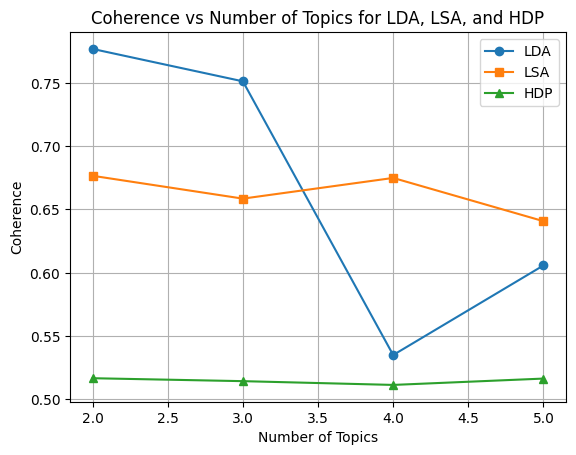

In [8]:
import spacy
from spacy.cli import download
from spacy.util import is_package
from spacy.lang.fr.stop_words import STOP_WORDS
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LsiModel, HdpModel  # Added HdpModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
from gensim.models import Phrases

# Helper: Automatically install and load spaCy model
def load_spacy_model(lang):
    model_map = {
        "fr": "fr_core_news_sm",
        "en": "en_core_web_sm"
    }
    model_name = model_map.get(lang)
    if not is_package(model_name):
        print(f"Downloading spaCy model: {model_name}...")
        download(model_name)
    return spacy.load(model_name)

def preprocess_text(text, lang='fr'):
    """
    Preprocess a single document:
    - Tokenize, lemmatize, remove stopwords, and filter short/non-alphabetic tokens.
    """
    nlp = load_spacy_model(lang)
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token) > 2]
    return tokens

# Function: Evaluate Coherence
def evaluate_coherence(model, processed_docs, dictionary):
    coherence_model = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Function: Plot coherence for multiple num_topics
def plot_coherence(corpus, dictionary, processed_docs, max_topics=5):
    lda_coherences = []
    lsa_coherences = []
    hdp_coherences = []
    
    for num_topics in range(2, max_topics + 1):
        # LDA Model
        lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        lda_coherence = evaluate_coherence(lda, processed_docs, dictionary)
        lda_coherences.append(lda_coherence)
        
        # LSA Model
        lsa = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        lsa_coherence = evaluate_coherence(lsa, processed_docs, dictionary)
        lsa_coherences.append(lsa_coherence)
        
        # HDP Model
        hdp = HdpModel(corpus=corpus, id2word=dictionary)
        hdp_coherence = evaluate_coherence(hdp, processed_docs, dictionary)
        hdp_coherences.append(hdp_coherence)

        print(f"num_topics={num_topics}, LDA Coherence={lda_coherence:.4f}, LSA Coherence={lsa_coherence:.4f}, HDP Coherence={hdp_coherence:.4f}")
    
    # Plot the coherence for LDA, LSA, and HDP
    plt.plot(range(2, max_topics + 1), lda_coherences, marker='o', label='LDA')
    plt.plot(range(2, max_topics + 1), lsa_coherences, marker='s', label='LSA')
    plt.plot(range(2, max_topics + 1), hdp_coherences, marker='^', label='HDP')
    
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence")
    plt.title("Coherence vs Number of Topics for LDA, LSA, and HDP")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Corpus
documents = [
    "La météo est agréable aujourd'hui. Le soleil brille et le vent est doux aujourd'hui. Cela fait de cette journée un moment parfait pour être à l'extérieur, faire une promenade ou simplement profiter du temps.",
    "Les élections présidentielles approchent bientôt. Les discussions politiques sont souvent complexes, avec des débats sur les réformes, les politiques économiques et les propositions de candidats. Cela suscite des échanges vifs parmi la population.",
    "L'équipe de football a gagné le match hier soir, un événement très attendu par les fans. Les joueurs ont montré un excellent esprit d'équipe et une grande détermination pour marquer le but décisif. Ce match était essentiel pour leur progression dans le tournoi.",
    "Le tennis est un sport populaire dans de nombreux pays. Ce sport est apprécié pour ses exigences physiques et techniques. Les compétitions internationales, telles que les tournois du Grand Chelem, attirent de nombreux spectateurs et joueurs talentueux du monde entier.",
    "Les discussions politiques sont souvent complexes. Cela inclut des débats sur les questions économiques, sociales, et internationales. Chaque élection met en lumière les différences de pensée et les visions divergentes des candidats, ce qui peut influencer les résultats du scrutin.",
    "Le tennis est un sport populaire dans de nombreux pays, avec une base de fans mondiale. Ce sport exige une grande concentration, des compétences techniques et un excellent physique. Les joueurs cherchent à maîtriser leur jeu tout en affrontant les meilleurs adversaires sur le circuit professionnel."
]

# Language Selection
lang = 'fr' 

# Preprocess all documents
print("Preprocessing documents...")
processed_docs = [preprocess_text(doc, lang) for doc in documents]

# Create Dictionary and Corpus
dictionary = Dictionary(processed_docs)

# Apply Bigram Model
bigram = Phrases(processed_docs, min_count=1, threshold=2)
bigram_model = [bigram[doc] for doc in processed_docs]

# Create Corpus
corpus = [dictionary.doc2bow(doc) for doc in bigram_model]

# LDA Model
print("\nBuilding LDA model...")
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42)
lda_coherence = evaluate_coherence(lda_model, processed_docs, dictionary)
print(f"LDA Coherence: {lda_coherence:.4f}")
print("LDA Topics:")
for topic_id, topic in lda_model.print_topics(num_words=5):
    print(f"Thème {topic_id}: {topic}")

# LSA Model
print("\nBuilding LSA model...")
lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=3)
lsa_coherence = evaluate_coherence(lsa_model, processed_docs, dictionary)
print(f"LSA Coherence: {lsa_coherence:.4f}")
print("LSA Topics:")
for topic_id, topic in lsa_model.print_topics(num_words=5):
    print(f"Thème {topic_id}: {topic}")

# HDP Model
print("\nBuilding HDP model...")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_coherence = evaluate_coherence(hdp_model, processed_docs, dictionary)
print(f"HDP Coherence: {hdp_coherence:.4f}")
print("HDP Topics:")
for topic_id, topic in hdp_model.print_topics(num_words=5):
    print(f"Thème {topic_id}: {topic}")

# Visualizing LDA Topics
print("\nVisualizing LDA topics...")
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')
print("LDA Visualization saved as 'lda_visualization.html'.")

# Experiment with Different num_topics for all models
print("\nExperimenting with different numbers of topics...")
plot_coherence(corpus, dictionary, processed_docs, max_topics=5)


Preprocessing documents...

Building LDA model...
LDA Coherence: 0.4360
LDA Topics:
Thème 0: 0.012*"économique" + 0.011*"grand" + 0.010*"mondial" + 0.009*"débat" + 0.009*"joueur"
Thème 1: 0.012*"offrir" + 0.011*"devenir" + 0.011*"plateforme" + 0.011*"permettre" + 0.010*"social"
Thème 2: 0.009*"produit" + 0.008*"devenir" + 0.007*"secteur" + 0.007*"patient" + 0.006*"donnée"

Building LSA model...


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


LSA Coherence: 0.6534
LSA Topics:
Thème 0: 0.278*"produit" + 0.233*"devenir" + 0.220*"plateforme" + 0.213*"secteur" + 0.211*"offrir"
Thème 1: 0.309*"grand" + 0.250*"mondial" + 0.249*"joueur" + 0.223*"équipe" + 0.223*"match"
Thème 2: 0.346*"social" + 0.244*"mondial" + 0.216*"justice" + 0.216*"droit" + -0.189*"équipe"

Building HDP model...
HDP Coherence: 0.7482
HDP Topics:
Thème 0: 0.017*mondial + 0.013*initiative + 0.012*croître + 0.012*présente + 0.012*promouvoir
Thème 1: 0.021*transformer + 0.015*gratitude + 0.015*quantique + 0.015*fossile + 0.014*droit
Thème 2: 0.014*mars + 0.014*produit + 0.013*mettre + 0.012*variation + 0.012*sentiment
Thème 3: 0.021*défi + 0.017*continuer + 0.012*pouvoir + 0.012*permettre + 0.012*attirer
Thème 4: 0.018*maîtriser + 0.015*extraterrestre + 0.013*prix + 0.012*faire + 0.012*secteur
Thème 5: 0.016*voie + 0.014*personnaliser + 0.013*innovation + 0.013*étudiant + 0.013*jouer
Thème 6: 0.025*matériau + 0.019*bien + 0.015*télétravail + 0.015*particulier + 0

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=2, LDA Coherence=0.4543, LSA Coherence=0.9918, HDP Coherence=0.7456


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=3, LDA Coherence=0.4360, LSA Coherence=0.6534, HDP Coherence=0.7462


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=4, LDA Coherence=0.4511, LSA Coherence=0.8157, HDP Coherence=0.7487


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


num_topics=5, LDA Coherence=0.4443, LSA Coherence=0.5997, HDP Coherence=0.7514


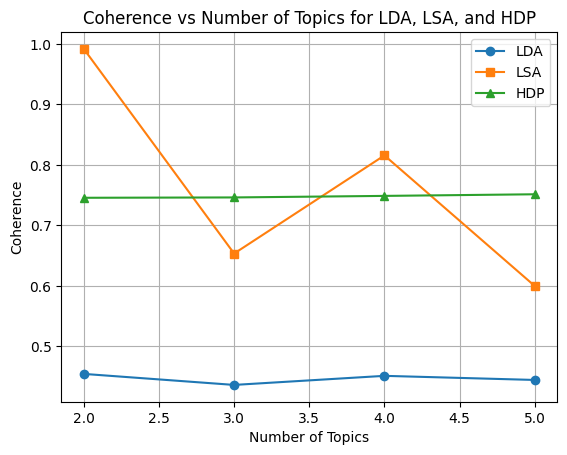

In [ ]:
import spacy
from spacy.cli import download
from spacy.util import is_package
from spacy.lang.fr.stop_words import STOP_WORDS
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LsiModel, HdpModel  # Added HdpModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
from gensim.models import Phrases

# Helper: Automatically install and load spaCy model
def load_spacy_model(lang):
    model_map = {
        "fr": "fr_core_news_sm",
        "en": "en_core_web_sm"
    }
    model_name = model_map.get(lang)
    if not is_package(model_name):
        print(f"Downloading spaCy model: {model_name}...")
        download(model_name)
    return spacy.load(model_name)

def preprocess_text(text, lang='fr'):
    """
    Preprocess a single document:
    - Tokenize, lemmatize, remove stopwords, and filter short/non-alphabetic tokens.
    """
    nlp = load_spacy_model(lang)
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token) > 2]
    return tokens

# Function: Evaluate Coherence
def evaluate_coherence(model, processed_docs, dictionary):
    coherence_model = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Function: Plot coherence for multiple num_topics
def plot_coherence(corpus, dictionary, processed_docs, max_topics=5):
    lda_coherences = []
    lsa_coherences = []
    hdp_coherences = []
    
    for num_topics in range(2, max_topics + 1):
        # LDA Model
        lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        lda_coherence = evaluate_coherence(lda, processed_docs, dictionary)
        lda_coherences.append(lda_coherence)
        
        # LSA Model
        lsa = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        lsa_coherence = evaluate_coherence(lsa, processed_docs, dictionary)
        lsa_coherences.append(lsa_coherence)
        
        # HDP Model
        hdp = HdpModel(corpus=corpus, id2word=dictionary)
        hdp_coherence = evaluate_coherence(hdp, processed_docs, dictionary)
        hdp_coherences.append(hdp_coherence)

        print(f"num_topics={num_topics}, LDA Coherence={lda_coherence:.4f}, LSA Coherence={lsa_coherence:.4f}, HDP Coherence={hdp_coherence:.4f}")
    
    # Plot the coherence for LDA, LSA, and HDP
    plt.plot(range(2, max_topics + 1), lda_coherences, marker='o', label='LDA')
    plt.plot(range(2, max_topics + 1), lsa_coherences, marker='s', label='LSA')
    plt.plot(range(2, max_topics + 1), hdp_coherences, marker='^', label='HDP')
    
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence")
    plt.title("Coherence vs Number of Topics for LDA, LSA, and HDP")
    plt.legend()
    plt.grid(True)
    plt.show()

documents = [
    "La météo est agréable aujourd'hui. Le soleil brille et le vent est doux aujourd'hui. Cela fait de cette journée un moment parfait pour être à l'extérieur, faire une promenade ou simplement profiter du temps.",
    "Les élections présidentielles approchent bientôt. Les discussions politiques sont souvent complexes, avec des débats sur les réformes, les politiques économiques et les propositions de candidats. Cela suscite des échanges vifs parmi la population.",
    "L'équipe de football a gagné le match hier soir, un événement très attendu par les fans. Les joueurs ont montré un excellent esprit d'équipe et une grande détermination pour marquer le but décisif. Ce match était essentiel pour leur progression dans le tournoi.",
    "Le tennis est un sport populaire dans de nombreux pays. Ce sport est apprécié pour ses exigences physiques et techniques. Les compétitions internationales, telles que les tournois du Grand Chelem, attirent de nombreux spectateurs et joueurs talentueux du monde entier.",
    "Les discussions politiques sont souvent complexes. Cela inclut des débats sur les questions économiques, sociales, et internationales. Chaque élection met en lumière les différences de pensée et les visions divergentes des candidats, ce qui peut influencer les résultats du scrutin.",
    "Le tennis est un sport populaire dans de nombreux pays, avec une base de fans mondiale. Ce sport exige une grande concentration, des compétences techniques et un excellent physique. Les joueurs cherchent à maîtriser leur jeu tout en affrontant les meilleurs adversaires sur le circuit professionnel.",
    
    # Ajout de nouveaux documents
    "La recherche en intelligence artificielle progresse rapidement, notamment dans les domaines de l'apprentissage automatique et du traitement du langage naturel. Des applications telles que les assistants virtuels et les véhicules autonomes deviennent de plus en plus courantes.",
    "Les avancées en biotechnologie offrent de nouvelles possibilités pour le traitement des maladies, notamment avec l'utilisation de la génétique pour développer des médicaments personnalisés et des traitements ciblés.",
    "Les enjeux environnementaux, comme le changement climatique et la gestion des ressources naturelles, sont au cœur des préoccupations mondiales. Les initiatives de développement durable cherchent à trouver un équilibre entre progrès économique et préservation de la planète.",
    "Les voyages spatiaux sont devenus un sujet fascinant, avec des missions vers Mars et la Lune planifiées pour les prochaines décennies. La recherche sur les exoplanètes et la vie extraterrestre suscite également un grand intérêt.",
    "L'éducation en ligne a connu une forte croissance ces dernières années, en particulier avec la pandémie de COVID-19. Les plateformes d'apprentissage à distance offrent des opportunités d'éducation pour les étudiants du monde entier, tout en permettant une certaine flexibilité.",
    "L'intelligence collective et la collaboration à grande échelle sont devenues des éléments clés pour résoudre certains des défis mondiaux. Le crowdsourcing et les plateformes collaboratives permettent d'accélérer l'innovation dans divers domaines.",
    "La transition énergétique est au centre des débats actuels. Les pays cherchent à réduire leur dépendance aux énergies fossiles et à promouvoir les énergies renouvelables comme le solaire et l'éolien pour combattre le changement climatique.",
    "Les dernières découvertes en physique quantique ont permis d'ouvrir de nouvelles perspectives pour le développement des technologies de l'information. Les ordinateurs quantiques pourraient révolutionner des secteurs comme la cryptographie et l'intelligence artificielle.",
    "Le télétravail est devenu une pratique courante dans de nombreux secteurs professionnels, offrant aux employés plus de flexibilité. Cependant, il présente également des défis en termes de gestion du temps et de maintien de la productivité à distance.",
    "La biodiversité mondiale est en déclin en raison des activités humaines telles que la déforestation, la pollution et le changement climatique. La conservation des écosystèmes est essentielle pour préserver les espèces animales et végétales en voie de disparition.",
    "Les grandes entreprises technologiques, telles que Google et Amazon, dominent de nombreux secteurs. Elles jouent un rôle majeur dans l'innovation, mais sont également critiquées pour leur pouvoir monopolistique et leurs pratiques de collecte de données.",
    "La psychologie positive, qui s'intéresse à l'étude des émotions et comportements positifs, gagne en popularité. Elle cherche à comprendre ce qui rend les individus heureux et épanouis, en mettant l'accent sur des approches comme la gratitude et l'optimisme.",
    "Le commerce en ligne a radicalement changé la manière dont les consommateurs interagissent avec les produits. Des plateformes comme Amazon et Alibaba dominent le marché, offrant une large gamme de produits et des options de livraison rapide."
    "Les avancées en robotique transforment divers secteurs, de la fabrication à la médecine. Les robots deviennent de plus en plus autonomes et intelligents, capables d'effectuer des tâches complexes avec une précision remarquable.",
    "Les dernières recherches sur l'impact des réseaux sociaux sur la société révèlent des effets profonds sur la santé mentale. Alors que ces plateformes permettent des connexions mondiales, elles peuvent aussi engendrer des sentiments d'isolement et d'anxiété chez les utilisateurs.",
    "L'économie circulaire cherche à maximiser l'utilisation des ressources naturelles en encourageant le recyclage et la réutilisation des matériaux. Ce modèle économique vise à réduire les déchets et à promouvoir un développement durable.",
    "Le rôle de l'intelligence artificielle dans les soins de santé continue de croître. De plus en plus d'outils d'IA sont utilisés pour analyser les données médicales et aider à la prise de décisions cliniques, améliorant ainsi les résultats des patients.",
    "Les cryptomonnaies ont suscité un grand intérêt ces dernières années, avec des variations de prix spectaculaires. Bien que cette forme de monnaie décentralisée soit prometteuse, elle reste soumise à des risques de volatilité et de régulation.",
    "Les droits de l'homme et la justice sociale continuent d'être au centre des discussions mondiales. De nombreux mouvements sociaux militent pour l'égalité des droits, l'accès à la justice et la fin des discriminations.",
    "Le télémedecine connaît une expansion rapide, particulièrement dans le contexte de la pandémie de COVID-19. Cette pratique permet aux patients de consulter des médecins à distance, rendant les soins de santé plus accessibles, notamment dans les régions éloignées."
]

# Language Selection
lang = 'fr' 

# Preprocess all documents
print("Preprocessing documents...")
processed_docs = [preprocess_text(doc, lang) for doc in documents]

# Create Dictionary and Corpus
dictionary = Dictionary(processed_docs)

# Apply Bigram Model
bigram = Phrases(processed_docs, min_count=1, threshold=2)
bigram_model = [bigram[doc] for doc in processed_docs]

# Create Corpus
corpus = [dictionary.doc2bow(doc) for doc in bigram_model]

# LDA Model
print("\nBuilding LDA model...")
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42)
lda_coherence = evaluate_coherence(lda_model, processed_docs, dictionary)
print(f"LDA Coherence: {lda_coherence:.4f}")
print("LDA Topics:")
for topic_id, topic in lda_model.print_topics(num_words=5):
    print(f"Thème {topic_id}: {topic}")

# LSA Model
print("\nBuilding LSA model...")
lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=3)
lsa_coherence = evaluate_coherence(lsa_model, processed_docs, dictionary)
print(f"LSA Coherence: {lsa_coherence:.4f}")
print("LSA Topics:")
for topic_id, topic in lsa_model.print_topics(num_words=5):
    print(f"Thème {topic_id}: {topic}")

# HDP Model
print("\nBuilding HDP model...")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_coherence = evaluate_coherence(hdp_model, processed_docs, dictionary)
print(f"HDP Coherence: {hdp_coherence:.4f}")
print("HDP Topics:")
for topic_id, topic in hdp_model.print_topics(num_words=5):
    print(f"Thème {topic_id}: {topic}")

# Visualizing LDA Topics
print("\nVisualizing LDA topics...")
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_visualizationenrichi.html')
print("LDA Visualization saved as 'lda_visualization.html'.")#MDS ou t-SNE

# Experiment with Different num_topics for all models
print("\nExperimenting with different numbers of topics...")
plot_coherence(corpus, dictionary, processed_docs, max_topics=5)
